In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

## DataFrame 'Drugs' Import

In [209]:
df = pd.read_csv('./SRC/drogas.csv')
df.columns = ['age', 'sex','blood_pression', 'cholesterol', 'sodium_potassium', 'drugs']

In [210]:
df.head()

,age,sex,blood_pression,cholesterol,sodium_potassium,drugs
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


It is necessary to transform the sex, blood pressure, cholesterol and drugs columns into numerical data

### Transforming categories data  in numerics

In [211]:
columns = ['sex','blood_pression', 'cholesterol', 'drugs']
for i in columns:
    df[i] = LabelEncoder().fit_transform(df[i])

In [212]:
df.head()

,age,sex,blood_pression,cholesterol,sodium_potassium,drugs
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


## Models training

### Separate training and trest data

In [213]:
X_train, X_test, y_train, y_test = train_test_split(df, df['drugs'], test_size=0.25, shuffle=True)

In [214]:
model = KNeighborsClassifier().fit(X_train, y_train)
y_predict = model.predict(X_test)

In [215]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.80      0.80      0.80         5
           2       0.40      1.00      0.57         2
           3       0.67      0.67      0.67         3
           4       1.00      0.79      0.88        14

    accuracy                           0.90        50
   macro avg       0.77      0.85      0.78        50
weighted avg       0.94      0.90      0.91        50



### Confusion Matrix

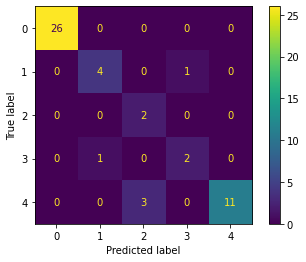

In [216]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

The confusion matrix plots the true x predicted results. It is possible to identify that the algorithm has a higher error rate in predicting drugs 1, 3 and 4, while drug 2 has few errors and the drug 0 is the one with the most hits.

### Decreasing the variation

When we have a small sample, the accuracy depends a lot on how you split the data for training and testing.

Therefore, it is interesting to replicate the training several times with the shuffled data

In [217]:
accuracies = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(df, df['drugs'], test_size=0.25, shuffle=True)
    model = KNeighborsClassifier().fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_predict))

print(f'Mean = {np.mean(accuracies)}')
print(f'Std = {np.std(accuracies)}')

Mean = 0.7972
Std = 0.059060646796322835


### K-neighbors x Precision Graphic 

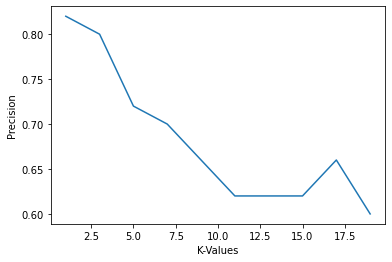

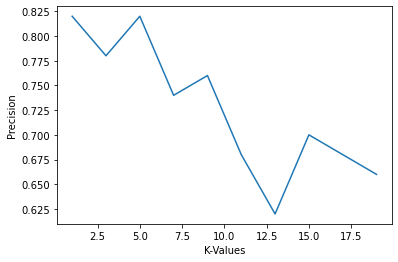

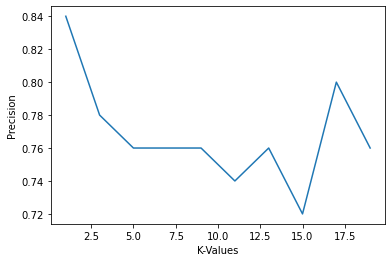

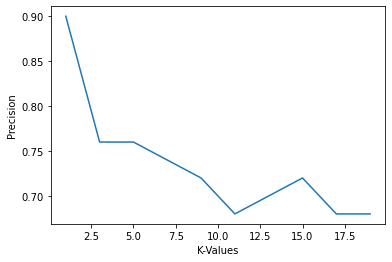

In [218]:
for k in range(4):
    k = []
    accuracy = []
    X_train, X_test, y_train, y_test = train_test_split(df, df['drugs'], test_size=0.25, shuffle=True)
    for i in range(1,20,2):
        k.append(i)
        model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
        y_predict = model.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_predict))
    fig, ax = plt.subplots()
    ax.plot(k, accuracy)
    ax.set(ylabel='Precision', xlabel='K-Values')
    plt.show()


In most plots the accuracy varies a lot with 1 neighbor, but it stabilizes with 3 and 5 plots and starts to fall from 7

## Comparing KFold with Hold out

In [219]:
X, y = df.drop(columns=['drugs']).to_numpy(), df['drugs']

In [227]:
accuracies = []
for i in range(10):
    kf = KFold(shuffle=True)
    for train_index, test_index in kf.split(df):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        model = KNeighborsClassifier().fit(X_train, y_train)
        accuracies.append(accuracy_score(y_test, model.predict(X_test)))

print(f'Mean accuracy k-fold = {np.mean(accuracies)}')
print(f'Std accuracy k-fold = {np.std(accuracies)}')

Mean accuracy k-fold = 0.674
Std accuracy k-fold = 0.0708801805866774


The K_Fold method after 50 iterations achieved stability, the same does not happen with the hold out method. This is because at each iteration in the kfold method, the test data is never repeated, so it uses all data for both testing and training. In the hold out method i the iterations with the data are done randomly, occurring that sometimes a single element may be related for testing in the iterations. The methods are similar, but in this case hold out did better with an average accuracy ranging from 77% to 80%, while in K-fold it was always around 67% a 68%